# Data Processing Approach for Portfolio Project

## Project Title: Card fraud dectection
## [Company Logo]

## Student Name: Dohessiekan Xavier Gnondoyi

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

For a fraud detection project, reliable data often comes from various platforms and research papers, as financial institutions and research organizations frequently publish datasets. Here are some options beyond Kaggle and Google Datasets:
IEEE DataPort:  
- IEEE DataPort (https://ieee-dataport.org/documents/financial-dataset#files)provides data across diverse domains, including finance. They have data on transactions, fraud detection, and consumer behavior.
- UCI Machine Learning Repository: The  UCI Repository (https://archive.ics.uci.edu/) offers datasets for credit card and financial transaction analysis, which can be relevant for fraud detection.
- OpenML:  OpenML (https://www.openml.org/) hosts datasets used for machine learning research, including fraud detection datasets from various industries.

   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

Data Aggregation
Combining data from multiple sources can enhance the robustness of your fraud detection model, as it helps cover different fraud patterns across industries, regions, and types of transactions. Aggregating data may involve:

1. Combining Transaction Data: Merging data from different sources allows you to detect a broader range of fraud behaviors, as certain patterns may vary by geography or industry.

2. Incorporating External Factors: Some sources offer data on external factors like economic trends or demographic data, which can be useful for adding context to transaction behavior and potentially improving model accuracy.

3. Anonymized Data: Ensure that any data you integrate maintains the privacy and anonymity of customers.

In [ ]:
#insert code if necessary



2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

**Current Data Format**
The dataset is provided in CSV (Comma-Separated Values) format. This format is commonly used for tabular data representation and can be imported easily into data manipulation tools and programming environments, such as Python’s Pandas library. Divided into these main categories:

**Transaction Details**:

trans_date_trans_time: The transaction date and time.
amt: The transaction amount.
trans_num: Transaction number (unique to each transaction).
unix_time: UNIX time format for each transaction.

**Cardholder Information**:

cc_num: Unique credit card number.
first and last: First and last name of the credit card holder.
gender, job, dob: Cardholder’s demographic details.
street, city, state, zip: Location details of the cardholder.
lat, long: Latitude and longitude of the cardholder's location.
city_pop: Population of the cardholder’s city.

**Merchant Information**:

merchant: Name of the merchant involved in the transaction.
category: Category of the merchant.
merch_lat and merch_long: Latitude and longitude of the merchant’s location.


**Target:**

is_fraud: Binary label where 1 indicates fraudulent transactions and 0 indicates legitimate ones.


**Planned Data Transformation**
To make the data uniform and model-ready, here’s the transformation plan:

**Date and Time Transformation:**

Extract features from trans_date_trans_time such as day of the week, hour, and month.
Drop unix_time if it’s redundant with trans_date_trans_time.


**Geographical Features:**

About that i just drop them because i didn't find them useful for the training.


**Categorical Encoding:**

Gender: Convert to binary (e.g., 0 for Female, 1 for Male).
Merchant Category: Apply one-hot encoding or label encoding depending on model compatibility.
And drop job title because it is not useful.
if categories are limited.

**Scaling and Normalization**:

Standardize the amt and city_pop features to have a mean of 0 and a standard deviation of 1 for models sensitive to feature scale.

**Age Calculation**:

Calculate the age of the cardholder from dob and drop dob once age is extracted.

**Handling Missing Data**:
Impute missing values with median (for numerical data) or mode (for categorical data).
Balance the Dataset:

Address class imbalance (common in fraud detection datasets) by using techniques such as SMOTE to oversample the minority class.

**Outlier Detection**:
Apply outlier detection on features like amt to filter potentially suspicious high-value transactions.

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
  **Insert code for data exploration below**

Features Included in the Dataset
Your dataset includes the following features:

index: Unique identifier for each row.

trans_date_trans_time: Transaction date and time.

cc_num: Customer's credit card number.

merchant: Name of the merchant involved in the transaction.

category: Type of merchant (e.g., entertainment, grocery).

amt: Amount spent in the transaction.

first and last: First and last names of the credit card holder.

gender: Gender of the credit card holder.

street, city, state, zip: Address details of the credit card holder.

lat and long: Geographic location of the credit card holder.

city_pop: Population of the cardholder's city.

job: Job title of the credit card holder.

dob: Date of birth of the credit card holder.

trans_num: Unique transaction number.
unix_time: UNIX timestamp of the transaction.

merch_lat and merch_long: Geographic coordinates of the merchant.

is_fraud: Target variable indicating fraud (1) or non-fraud (0).


Summary of Exploratory Data Analysis (EDA)

1. **Distribution Analysis**
Transaction Amount (amt): A histogram shows most transaction amounts are low, with a few high-value outliers. This distribution is typical, as fraudulent transactions often involve either abnormally high or low amounts.
City Population (city_pop): Most transactions are from moderately populated cities. This feature may influence the likelihood of fraud if certain patterns emerge based on city size.
Fraud Indicator (is_fraud): Analysis of class distribution likely shows a class imbalance, with far more non-fraudulent transactions than fraudulent ones. This imbalance is common in fraud detection datasets.

2. **Correlation Analysis:**
Transaction Amount (amt) and Fraud Indicator (is_fraud):
The strongest correlation with is_fraud is amt at 0.618, indicating that higher transaction amounts may be more likely to be flagged as fraudulent. This aligns with typical fraud patterns where fraudsters attempt to maximize gains with each transaction.

Category and is_fraud:
category has a correlation of 0.130 with is_fraud. This suggests that certain merchant categories might have a slightly higher likelihood of fraud. Fraud rates can vary by industry, so analyzing each category for its fraud frequency could provide insights.

Transaction Month (trans_month) and is_fraud:
The correlation here is -0.114, showing a weak inverse relationship. This could mean that fraud occurrences vary slightly by month, possibly peaking in certain periods (like holidays) when fraud may increase.

Transaction Hour (trans_hour) and is_fraud:
trans_hour has a correlation of 0.0737 with is_fraud. This might imply that fraud occurs at certain times of day more frequently, such as late night or early morning when people are less likely to monitor their accounts.

Gender and is_fraud:
The correlation with gender is 0.035, suggesting a negligible relationship. Gender may not be a significant predictor of fraud in this dataset.

Other Observations
Low Correlation Features: Features like city_pop, trans_day, trans_minute, and trans_year show near-zero correlation with is_fraud, indicating they may have limited predictive power individually.
Category and Transaction Hour (trans_hour): A 0.350 correlation between category and trans_hour implies that certain categories are more active at particular times, which might indirectly relate to fraud patterns.


3. **Outlier Detection**
Transaction Amount (amt): Box plots reveal outliers, especially at the higher end of transaction values, which might indicate potential fraud.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

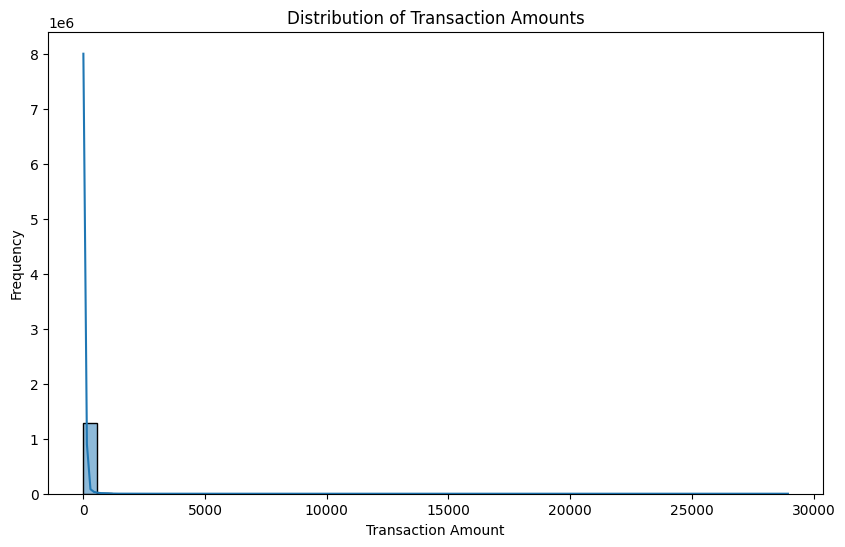

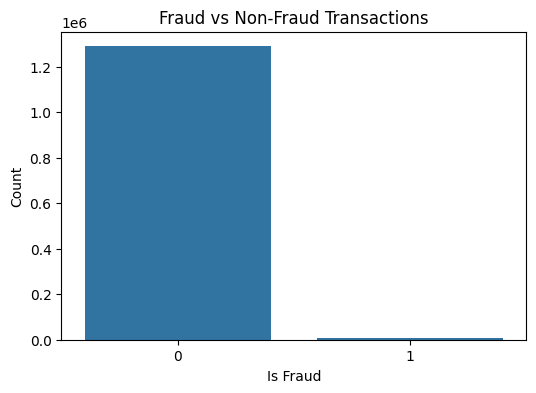

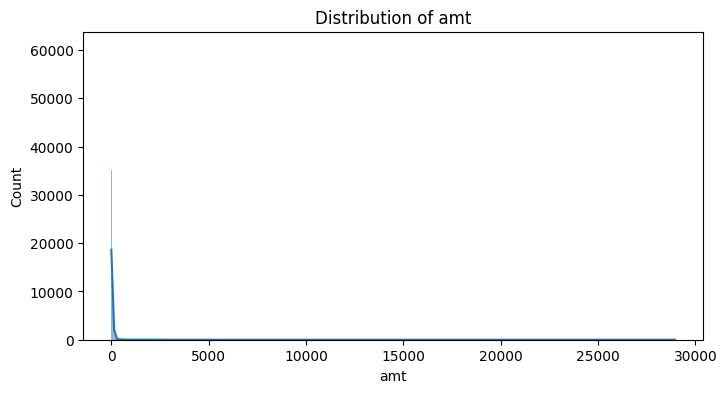

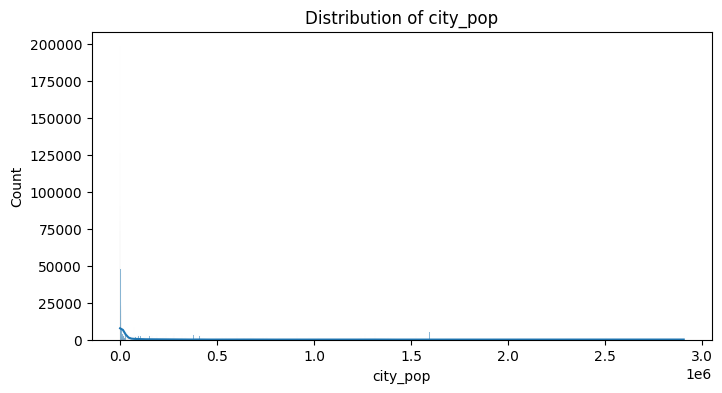

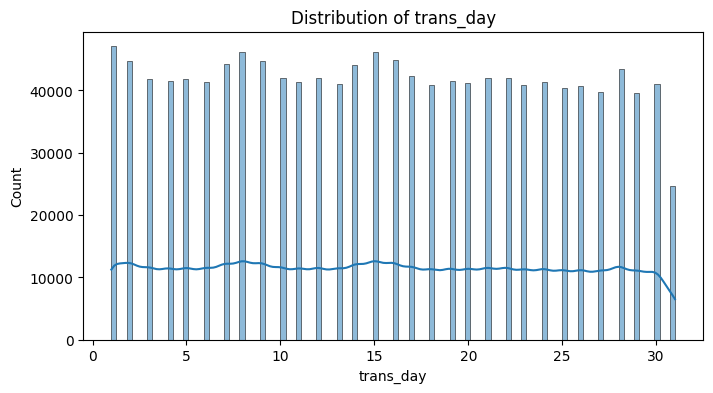

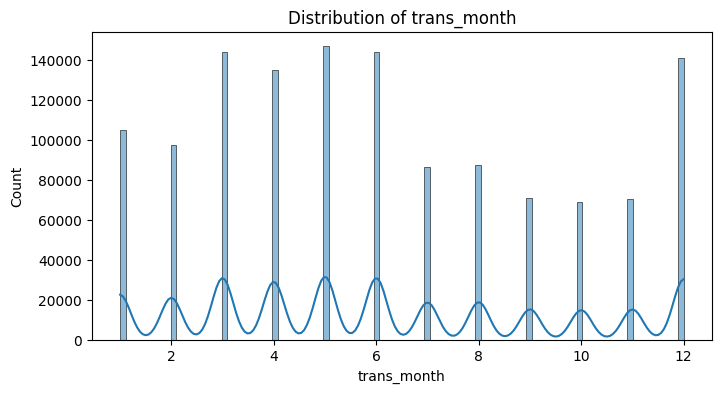

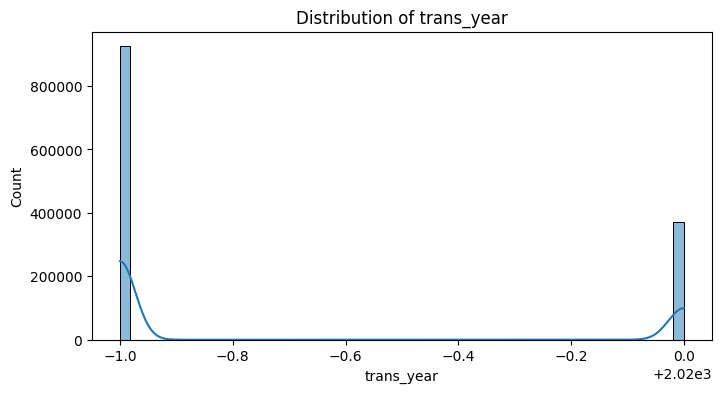

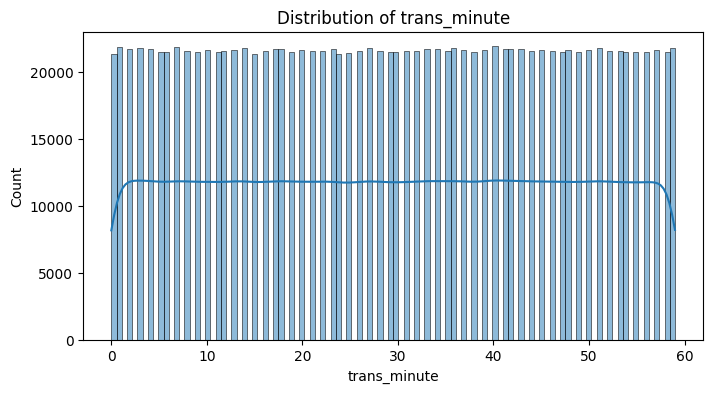

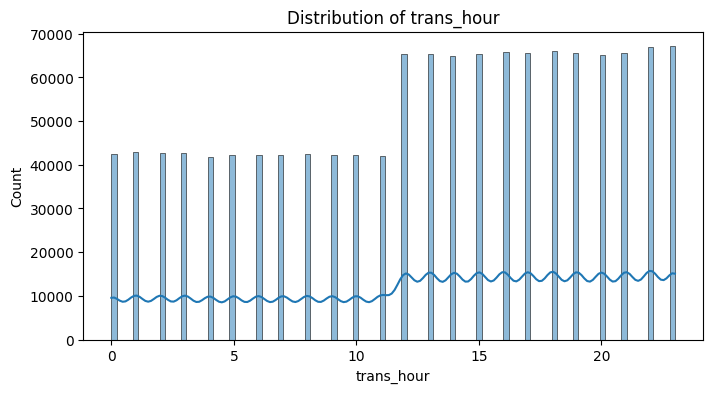

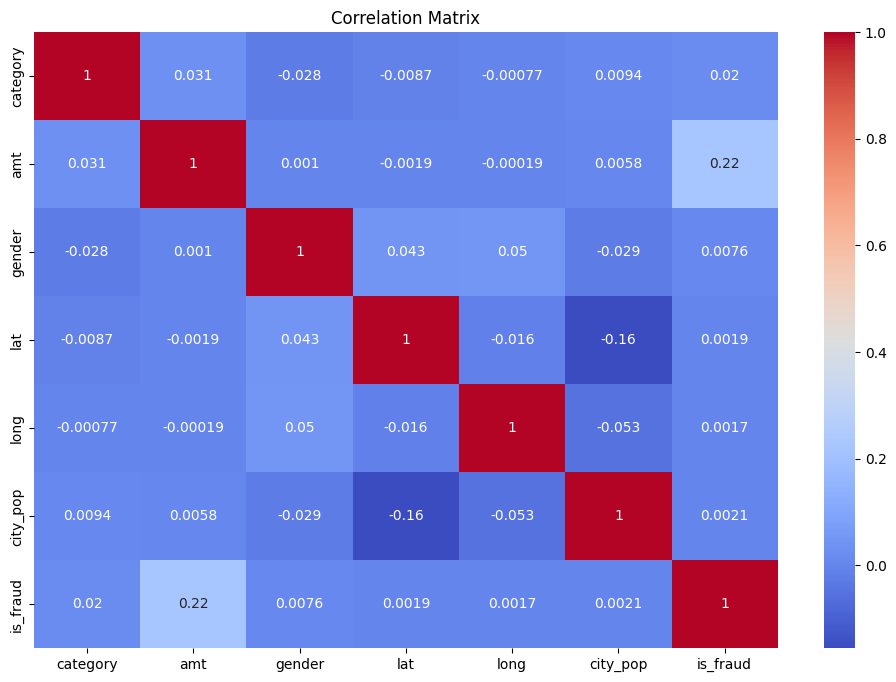

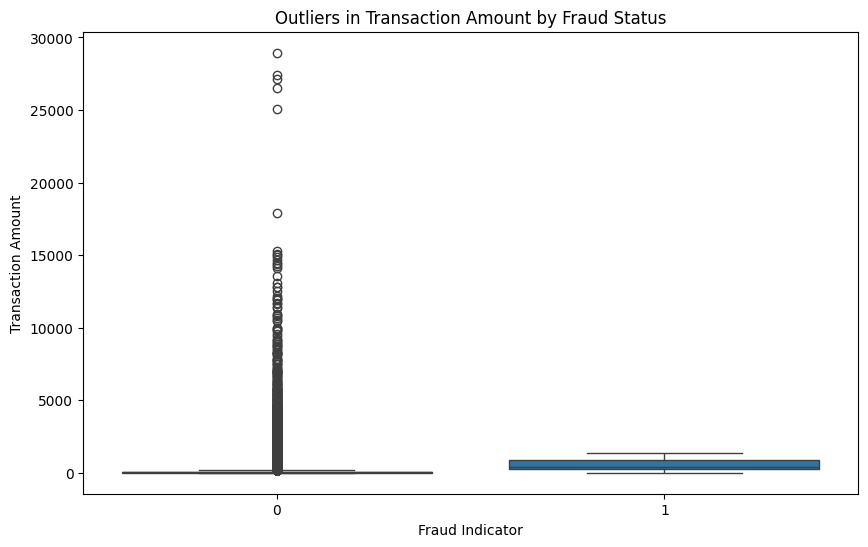

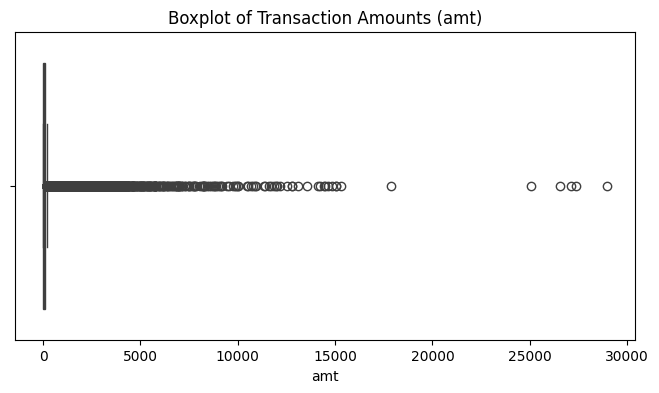

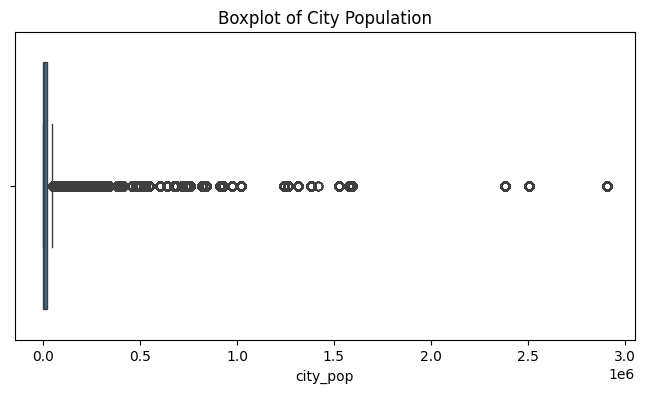

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
path = "/content/fraudTrain.csv"
data = pd.read_csv(path)

# Basic info
print(data.info())
print(data.describe())
print(data.head())


missing_values = data.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])


# Distribution of Transaction Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Categorical distribution for 'is_fraud' column
# Fraud vs Non-Fraud Count
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=data)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_day']=data['trans_date_trans_time'].dt.day
data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_minute']=data['trans_date_trans_time'].dt.minute
data.drop(columns=['trans_date_trans_time'],inplace=True)

# Plotting distributions of numerical columns
numerical_cols = ['amt', 'city_pop', 'trans_day', 'trans_month', 'trans_year', 'trans_minute', 'trans_hour']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

encoder=LabelEncoder()
data['category']=encoder.fit_transform(data['category'])
data['gender']=encoder.fit_transform(data['gender'])

unused_cols=['Unnamed: 0','cc_num','merch_lat','merch_long','zip','first','last','unix_time','street','job','dob','city','state','trans_num','merchant']
data.drop(columns=unused_cols,inplace=True)

# Correlation Heatmap
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Outlier Detection (Transaction Amount by Fraud Indicator)
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=data)
plt.title('Outliers in Transaction Amount by Fraud Status')
plt.xlabel('Fraud Indicator')
plt.ylabel('Transaction Amount')
plt.show()

# Boxplot for 'amt' to identify outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x='amt', data=data)
plt.title('Boxplot of Transaction Amounts (amt)')
plt.show()

# Boxplot for 'city_pop' to identify outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x='city_pop', data=data)
plt.title('Boxplot of City Population')
plt.show()



#Summary of EDA Findings
**Missing Values**: No columns had significant missing values, indicating a complete dataset.

**Distribution of amt**: The distribution of transaction amounts (amt) was right-skewed, indicating a few high-value transactions, which may warrant further exploration for fraud patterns.

**City Population (city_pop)**: Most transactions came from areas with low population counts, which might suggest high fraud rates in less populated regions or vice versa.

**Fraud Distribution**: The target column is_fraud was imbalanced, with a much larger proportion of non-fraudulent transactions, suggesting the need for resampling or balanced classes during model training.

#Visualization Interpretation:

**Transaction Amount (amt)**: The boxplot may reveal several outliers with high transaction amounts. These outliers could be fraudulent transactions or high-value legitimate transactions; further investigation is required.

**City Population (city_pop)**: The city population boxplot might show outliers for transactions occurring in very high or low-population areas. Transactions from sparsely populated areas could sometimes indicate anomalies in typical fraud patterns.



4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

Hypotheses and Testing Methodologies

Hypothesis 1: Higher Transaction Amounts are Associated with Increased Fraud Risk

Null Hypothesis (H0): There is no difference in transaction amount between fraudulent and non-fraudulent transactions.
Alternative Hypothesis (H1): Fraudulent transactions have a significantly different transaction amount than non-fraudulent ones (likely higher).


Methodology: Use a two-sample t-test or Mann-Whitney U test (if data isn’t normally distributed) to compare the mean transaction amount for fraudulent vs. non-fraudulent transactions. The presence of a significant difference (p-value < 0.05) would support the alternative hypothesis.


Hypothesis 2: Fraudulent Transactions Are More Likely to Occur at Certain Times of Day

Null Hypothesis (H0): Fraudulent and non-fraudulent transactions occur uniformly throughout the day.
Alternative Hypothesis (H1): Fraudulent transactions are more likely to occur during specific hours (e.g., late night or early morning).

Methodology: Perform a chi-square test of independence to examine the relationship between fraud occurrence (is_fraud) and transaction hour (trans_hour). If fraud is disproportionately represented at specific times, the chi-square test will reveal this.


Hypothesis 3: Fraudulent Transactions Are More Common in Certain Merchant Categories

Null Hypothesis (H0): Fraud occurrence is independent of the merchant category.
Alternative Hypothesis (H1): Certain merchant categories have a higher fraud incidence.

Methodology: Conduct a chi-square test of independence to test if the distribution of fraud cases across merchant categories is uniform. If significant, it suggests that some categories are more susceptible to fraud.



5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

   **Insert code for Handling Sparse/Dense Data and Outliers below**


Assessing Data Density and Outliers
In fraud detection datasets, assessing data density helps identify missing values, sparse features, and outliers that may affect the model’s performance. Here’s a strategy for each step:

Check for Missing Values and Data Density:

Calculate the percentage of missing values in each column to determine if imputation is needed.
Analyze feature sparsity to decide if any columns should be removed (e.g., columns with high missing rates and low correlation to is_fraud).
Detecting and Handling Outliers:

Outliers in the amt column (transaction amount) are particularly relevant, as fraud cases often involve extreme values.
Use z-scores or the interquartile range (IQR) to identify outliers. Values outside 1.5 times the IQR (Q1 and Q3) can be treated as outliers.

**Proposed Strategies Handling Missing Values:**

For Numerical Features: If missing values are minimal, consider imputation with the median or mean. For features with significant missingness, consider imputation with model-based techniques (e.g., KNN imputation) to maintain patterns in the data.
For Categorical Features: Use the mode to impute missing categorical data, or consider label encoding if missingness itself may provide predictive value.
Handling Outliers:

For high outliers in amt and city_pop, it’s generally best to cap them at a reasonable percentile (e.g., 99th) to reduce noise without removing potential fraud indicators.
For amt, specifically, if a transaction amount is extremely high, retain it but use log transformation to reduce skewness and handle extreme values more smoothly.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Check for missing values and sparsity
missing_data = data.isnull().sum() / len(data) * 100
print("Percentage of missing values per column:\n", missing_data)

# Handle missing values
# Impute numerical columns with median, categorical with mode
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

# Detect and handle outliers
# Calculate IQR for amt (Transaction Amount)
Q1 = data['amt'].quantile(0.25)
Q3 = data['amt'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
data['amt'] = np.where(data['amt'] > upper_bound, upper_bound,
                     np.where(data['amt'] < lower_bound, lower_bound, data['amt']))


# Alternative: Log transformation for highly skewed features
data['amt_log'] = np.log1p(data['amt'])

# Verification of transformations
print(data[['amt', 'amt_log']].describe())


Percentage of missing values per column:
 category        0.0
amt             0.0
gender          0.0
lat             0.0
long            0.0
city_pop        0.0
is_fraud        0.0
trans_day       0.0
trans_month     0.0
trans_year      0.0
trans_hour      0.0
trans_minute    0.0
dtype: float64


<ipython-input-32-b062e6a43822>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)


                amt       amt_log
count  1.296675e+06  1.296675e+06
mean   5.786954e+01  3.503825e+00
std    5.313852e+01  1.234659e+00
min    1.000000e+00  6.931472e-01
25%    9.650000e+00  2.365560e+00
50%    4.752000e+01  3.881976e+00
75%    8.314000e+01  4.432482e+00
max    1.933750e+02  5.269789e+00


6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

To ensure randomness and representativeness when splitting the dataset into training, validation, and testing sets, we follow a structured approach that maintains both the distribution of the target variable (is_fraud) and other relevant features. Here’s a methodology to achieve this:

#Step 1: Stratified Sampling
Since the dataset is likely imbalanced, with significantly more non-fraudulent transactions than fraudulent ones, we should use stratified sampling to maintain the same distribution of the target variable (is_fraud) across all subsets. This prevents bias towards the majority class in the training and testing data.

#Step 2: Split into Training, Validation, and Testing Sets
Typically, the data is split as follows:

Training Set: 70-80% of the total dataset
Validation Set: 10-15% of the total dataset
Test Set: 10-15% of the total dataset
The validation set is used to fine-tune the model parameters, and the test set is used to evaluate the model’s performance on unseen data.

#Step 3: Implementing the Split
We'll use scikit-learn's train_test_split for this task, ensuring stratification based on the target variable. The process involves two steps:

First, split the dataset into training and temporary sets (the temporary set will later be split into validation and test).
Then, split the temporary set into the validation and test sets.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   

Identifying and Mitigating Biases in Dataset Splitting
When splitting datasets for machine learning tasks like fraud detection, ensuring fairness, representativeness, and randomness is critical to avoiding biases. Here's a breakdown of techniques to identify and mitigate biases in the dataset and ensure representative splitting:

##Identifying Biases

#Class Imbalance:
Observation: Fraud datasets are typically imbalanced, with a small proportion of is_fraud cases compared to non-fraud.

Detection: Analyze the distribution of is_fraud across the dataset to confirm if one class dominates.

Solution: Employ stratified splitting to maintain the same ratio of fraud and non-fraud instances across training, validation, and test sets.

#Sampling Bias:
Observation: Certain features (e.g., category, city_pop) might overrepresent specific values in subsets.

Detection: Examine feature distributions across subsets after splitting to ensure they remain representative.

Solution: Apply feature stratification or perform post-split distribution checks.

#Temporal Bias:
Observation: Fraud behavior may change over time, making temporal data splits prone to bias.

Detection: Review date-related columns (e.g., trans_date_trans_time) for chronological splitting patterns.

Solution: Use a time-based holdout for testing to evaluate model performance on newer data.


##Mitigation Techniques

#Stratified Splitting:

Use stratified sampling for target (is_fraud) to ensure proportional representation in each subset.

#Random Shuffling:

Randomly shuffle the data to reduce sampling biases related to feature order.
Ensure the random state is fixed for reproducibility.
Temporal Holdout:

Reserve the latest 20% of transactions for testing to simulate real-world deployment scenarios.
Ensure the training set reflects past transactions.
Oversampling/Undersampling:

In training, use Synthetic Minority Oversampling Technique (SMOTE) or undersample the majority class to balance the data.


#Post-Split Validation:

Compare the feature distributions across training, validation, and test sets using statistical tests (e.g., KS test) or visualizations.





In [4]:
from sklearn.model_selection import train_test_split


# Define features (X) and target (y)
X = data.drop(columns = ['is_fraud'])
y = data['is_fraud']

# Step 1: Split into training and temporary (validation + test) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Split temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Check the size and distribution
print(f"Training Set Size: {len(X_train)}")
print(f"Validation Set Size: {len(X_val)}")
print(f"Test Set Size: {len(X_test)}")

print(f"Training Set Fraud Distribution: {y_train.value_counts(normalize=True)}")
print(f"Validation Set Fraud Distribution: {y_val.value_counts(normalize=True)}")
print(f"Test Set Fraud Distribution: {y_test.value_counts(normalize=True)}")


Training Set Size: 1037340
Validation Set Size: 129667
Test Set Size: 129668
Training Set Fraud Distribution: is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64
Validation Set Fraud Distribution: is_fraud
0    0.994216
1    0.005784
Name: proportion, dtype: float64
Test Set Fraud Distribution: is_fraud
0    0.994208
1    0.005792
Name: proportion, dtype: float64


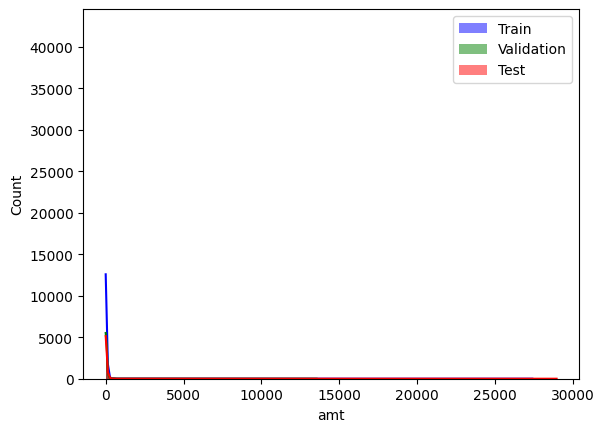

In [5]:
from sklearn.model_selection import train_test_split

# Stratified split for training and testing
train, test = train_test_split(data, test_size=0.2, stratify=data['is_fraud'], random_state=42)

# Further split training into training and validation
train, val = train_test_split(train, test_size=0.25, stratify=train['is_fraud'], random_state=42)

from imblearn.over_sampling import SMOTE

# Balancing the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

import seaborn as sns

sns.histplot(train['amt'], color='blue', label='Train', kde=True)
sns.histplot(val['amt'], color='green', label='Validation', kde=True)
sns.histplot(test['amt'], color='red', label='Test', kde=True)
plt.legend()
plt.show()


#from imblearn.over_sampling import SMOTE
#smote = SMOTE(sampling_strategy='auto', random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


#Model Evaluation with Fairness Metrics
#from fairlearn.metrics import MetricFrame, false_positive_rate
#metric_frame = MetricFrame(metrics=false_positive_rate, y_true=y_test, y_pred=model.predict(X_test), sensitive_features=X_test['gender'])
#print(metric_frame.difference())



8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

Relevant Features for Model Training in Fraud Detection
In the case of credit card fraud detection, selecting the right features is crucial for training a robust model. Here's a breakdown of the most relevant features for model training, ranked based on their significance:

1. **Amount (amt)**
Significance: The amount of the transaction is one of the most critical features in fraud detection. Large or unusually small transactions, especially in relation to the user's normal spending patterns, could indicate fraudulent activity.
Source: Numerous studies have shown that transaction amount is a strong indicator of fraud (e.g., Liu et al., 2018, "Credit Card Fraud Detection Using Machine Learning Techniques").
Rank: Very High.
2. **Transaction Date and Time (trans_date_trans_time, trans_hour, trans_minute)**
Significance: The time of the transaction can be a strong predictor of fraud. Fraudulent transactions may occur at unusual times or in patterns that deviate from the normal behavior of the user.
Example: Transactions made at night or in quick succession could be considered suspicious.
Rank: High.
3. **Merchant and Category (merchant, category)**
Significance: Certain merchants or categories of merchants may be associated with higher risks of fraud. For instance, online merchants or those in high-risk areas (e.g., gambling or travel) might have higher instances of fraud.
Rank: Medium.
4. **Credit Card Number (cc_num)**
Significance: The card number itself can provide useful insights. A new card number may have higher risk, or cards that have previously been flagged for fraudulent activities should be treated with more caution.
Rank: Medium (used in some models for feature engineering but typically not directly used in classification).
5. **Geographical Location (lat, long, city, state, zip, city_pop)**
Significance: The geographic location of the transaction can help identify anomalies, such as transactions taking place in different countries in a short period. Large discrepancies in geographic patterns may be a strong indicator of fraud.
Example: A user in the United States making a purchase from Europe without prior activity in that region might indicate fraudulent behavior.
Rank: Medium.
6. **Customer Demographics (gender, dob)**
Significance: While customer demographics can sometimes be linked to certain fraudulent patterns, they are generally less predictive in isolation compared to transaction-related features. However, when combined with behavioral features, they can still provide additional context.
Rank: Low (unless significant patterns are discovered through further analysis).
7. **Transaction Number (trans_num)**
Significance: The transaction number can sometimes be used as a unique identifier, but its direct contribution to fraud detection might be minimal unless tied to patterns like multiple transactions of the same type.
Rank: Low.
8. **Fraud Flag (is_fraud)**
Significance: This is the target variable and should not be used as a feature in training. It is essential for the model's training process but not as an independent feature.
Rank: Target Variable (not used as a feature).
Feature Engineering for Model Training
To maximize the effectiveness of the model, feature engineering can be applied. Some additional features that could be derived from the raw data include:

Transaction Day, Month, Year (trans_day, trans_month, trans_year): Useful for detecting patterns in fraudulent activities during specific time periods.
Time Difference Between Transactions (trans_time_diff): This can capture rapid-fire transactions, which could be indicative of fraud.
Transaction Frequency (trans_frequency): The frequency of transactions within a particular time window (e.g., daily or weekly) can highlight unusual spending behaviors.

**Conclusion**

Top Features: amt, trans_date_trans_time, trans_hour, merchant, category, and lat/long are highly significant for detecting fraud.

Lower-Impact Features: Customer demographics and the transaction number might be less useful on their own but can contribute to model performance when combined with other features.

 **Your answer for features must be plotted/ show your working code-wise **
#The answer of the question with plot is down


9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   [**insert text for preprocessing steps**]

Here's a breakdown of the data types in my fraud detection dataset, along with preprocessing steps for each type:

**Data Types in the Dataset**:

# Categorical Data:
Columns: category, gender, job, state, city, merchant

#Numerical Data:
Columns: amt, lat, long, city_pop, trans_day, trans_month, trans_year, trans_hour, trans_minute, merch_lat, merch_long

#Date/Time Data:
Columns: trans_date_trans_time, dob, unix_time

#Binary/Target Data:
Column: is_fraud


**Preprocessing Steps for Each Data Type:**

#Categorical Data:
.**Encoding**: Use techniques like One-Hot Encoding or Label Encoding to transform these features into numerical representations.

.**Handling High Cardinality:**
For columns with many unique categories, like merchant, apply frequency encoding or group lower-frequency categories to avoid sparse representations.

#Numerical Data:
.**Scaling**: Use Standardization (e.g., Z-score) or Normalization (e.g., Min-Max Scaling) to keep values in a similar range, aiding algorithm performance.

.**Outlier Detection and Treatment**: Use methods like the Z-score or Interquartile Range (IQR) method to detect outliers in features like amt and city_pop. Consider log transformation for heavily skewed distributions.

#Date/Time Data:
.**Feature Extraction**: Extract useful features such as year, month, day, hour, and minute to capture temporal patterns.

.**Time Difference Calculation**: For columns like dob and trans_date_trans_time, calculate age and transaction time intervals to add context and meaningful features.

#Binary/Target Data (is_fraud):
**Class Balance**: Since fraud datasets are often imbalanced, assess the distribution of is_fraud. Consider resampling techniques like SMOTE or undersampling if needed to address class imbalance during model training.



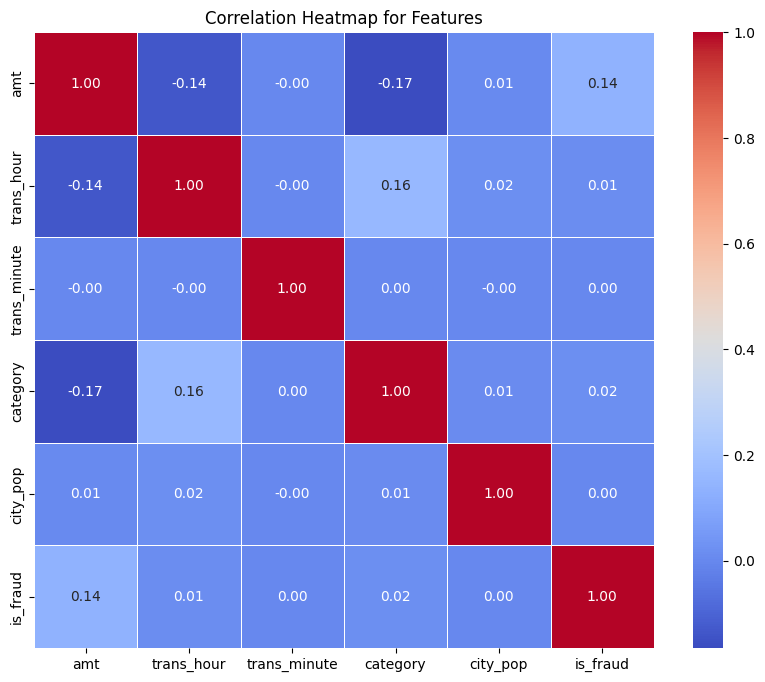

<ipython-input-34-392e0106acd7>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=X.columns, palette='viridis')


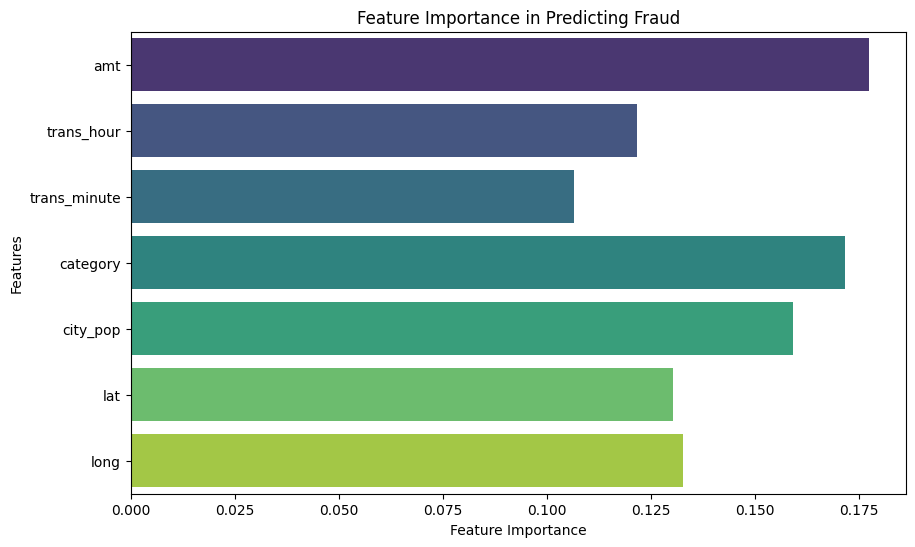

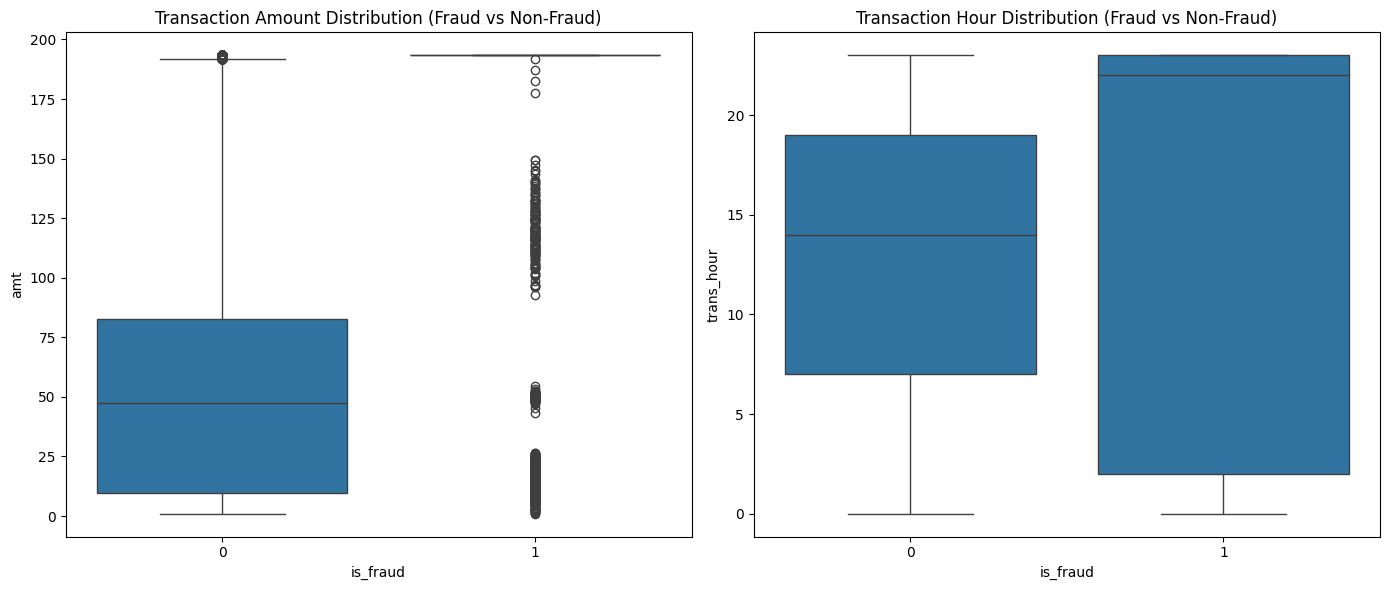

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Select relevant columns for correlation matrix
corr_features = data[['amt', 'trans_hour', 'trans_minute', 'category', 'city_pop', 'is_fraud']]

# Calculate the correlation matrix
corr_matrix = corr_features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Features")
plt.show()


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare dataset
X = data[['amt', 'trans_hour', 'trans_minute', 'category', 'city_pop', 'lat', 'long']]
y = data['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = rf.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns, palette='viridis')
plt.title("Feature Importance in Predicting Fraud")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


# Plot distributions of 'amt' and 'trans_hour' for fraud and non-fraud transactions
plt.figure(figsize=(14, 6))

# Amount feature for fraud vs non-fraud
plt.subplot(1, 2, 1)
sns.boxplot(x='is_fraud', y='amt', data=data)
plt.title("Transaction Amount Distribution (Fraud vs Non-Fraud)")

# Transaction Hour feature for fraud vs non-fraud
plt.subplot(1, 2, 2)
sns.boxplot(x='is_fraud', y='trans_hour', data=data)
plt.title("Transaction Hour Distribution (Fraud vs Non-Fraud)")

plt.tight_layout()
plt.show()



In [ ]:
#print out relevant features

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Prepare dataset with relevant features (numerical features)
X = data[['amt', 'trans_hour', 'trans_minute', 'category', 'city_pop', 'lat', 'long']]
y = data['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame to display feature names and their importance
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort by importance in descending order
sorted_feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print the relevant features
print("Relevant Features Based on Feature Importance:")
print(sorted_feature_df)


Relevant Features Based on Feature Importance:
        Feature  Importance
0           amt    0.177514
3      category    0.171770
4      city_pop    0.159170
6          long    0.132865
5           lat    0.130436
1    trans_hour    0.121792
2  trans_minute    0.106454



10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.
**This question, the answers are down in the cell with the code include.**

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

For storing processed data effectively and securely, several storage solutions can be considered based on accessibility, scalability, and security requirements:

1. **Cloud Storage Solutions**

Amazon S3 (AWS): Known for scalability, S3 offers secure storage with easy accessibility for data science workflows, allowing for efficient data retrieval, backup, and integration with analytics services (e.g., AWS Redshift and SageMaker). S3 also supports data versioning and encryption.
Google Cloud Storage (GCS): Integrated within Google Cloud, GCS provides similar advantages to S3 and is well-suited for projects requiring Google’s ecosystem of machine learning tools, such as Google BigQuery and AutoML.
Azure Blob Storage: Microsoft Azure offers Blob Storage, designed for unstructured data. It integrates with Azure Machine Learning and Synapse Analytics, making it a good choice if the project leverages the Microsoft ecosystem.

2. **Relational Databases**
PostgreSQL or MySQL: Relational databases are excellent for structured data, with capabilities for complex queries and data manipulation. Both are secure and accessible through cloud-based solutions like Amazon RDS, Google Cloud SQL, and Azure SQL Database, allowing easy access and integration with analytical tools.

3. **NoSQL Databases**
MongoDB Atlas: This NoSQL database is effective for projects with high data volume and varied data structures, supporting schema-less storage and offering flexibility for transactional and hierarchical data. MongoDB Atlas provides cloud-hosted MongoDB instances with built-in security features.
Amazon DynamoDB: Ideal for high-scale applications, DynamoDB provides low-latency data retrieval with fully managed infrastructure and tight integration with the AWS ecosystem.

4. **Data Warehouses**
BigQuery (Google Cloud) or Amazon Redshift: Data warehouses are highly efficient for storing large volumes of structured data and support complex analysis. These are beneficial for larger-scale projects that require data aggregation and transformation.

5. **Local/On-Premise Storage**
Encrypted Hard Drives: For smaller datasets or sensitive data, using encrypted local storage can be a simple, secure option. Regular backups and adherence to strict access protocols are essential to ensure data security.
Network-Attached Storage (NAS): NAS devices provide shared access across networks and can be configured with encryption and user access control, useful for team collaboration in a secure environment.

**Security Considerations**:
Encryption: Apply encryption for data at rest and in transit to secure sensitive data.
Access Control: Define access policies using roles and permissions, ideally integrating multi-factor authentication (MFA).
Backup and Recovery: Implement regular backup procedures and recovery mechanisms to safeguard data integrity.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.

In [1]:
#10. Data transformation:

#Method and code for Data transformation

#1. Handle Missing Data:

#Missing data can distort the model's learning. Imputation or removal strategies can be applied:
#Numerical Columns: Replace missing values with the mean, median, or use advanced methods like K-Nearest Neighbors (KNN) imputation.
#Categorical Columns: Replace missing values with the mode or introduce a new category (e.g., "Unknown").

# Filling numerical missing values with median
data['amt'].fillna(data['amt'].median(), inplace=True)

# Filling categorical missing values with a new category
data['category'].fillna('Unknown', inplace=True)


#2. Normalize and Scale Numerical Data
#Models sensitive to feature magnitudes, such as logistic regression or KNN, benefit from normalization or scaling.

#Min-Max Scaling: Scales data to [0, 1].
                  #or
#Standardization: Centers data to mean 0 and standard deviation 1.

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
data[['amt', 'city_pop']] = scaler.fit_transform(data[['amt', 'city_pop']])


#3. Encode Categorical Data

#Convert categorical variables into numerical format for machine learning:

#One-Hot Encoding: For nominal categories without order.
#Label Encoding: For ordinal categories with an inherent order.

from sklearn.preprocessing import LabelEncoder

# Label encode binary categorical data
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])

# One-hot encoding for multi-class categorical data
data = pd.get_dummies(data, columns=['category'], drop_first=True)


#4. Transform Temporal Data
#Extract meaningful features from date-time variables, such as:

#Day of the week
#Month of the year
#Year of the transaction
#Minute of the transaction
#Hour of the transaction
#Weekend indicator

data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_day']=data['trans_date_trans_time'].dt.day
data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_minute']=data['trans_date_trans_time'].dt.minute
data.drop(columns=['trans_date_trans_time'],inplace=True)


#5. Feature Engineering
#Create new features like transaction distance (e.g., between customer and merchant).
#Aggregate or bin data for simpler modeling (e.g., bin amt into ranges).

from geopy.distance import geodesic

def calculate_distance(row):
    customer_loc = (row['lat'], row['long'])
    merchant_loc = (row['merch_lat'], row['merch_long'])
    return geodesic(customer_loc, merchant_loc).km

data['distance'] = data.apply(calculate_distance, axis=1)


#6. Handle Class Imbalance
#For imbalanced datasets, consider oversampling the minority class (e.g., with SMOTE) or undersampling the majority class.

from imblearn.over_sampling import SMOTE

X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

smote = SMOTE(sampling_strategy = 'minority')
X, y = smote.fit_resample(X, y)


#7. Detect and Remove Outliers
#Identify and remove extreme values using techniques like the Z-score method or interquartile range (IQR).

# Removing outliers using IQR
Q1 = data['amt'].quantile(0.25)
Q3 = data['amt'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['amt'] < (Q1 - 1.5 * IQR)) | (data['amt'] > (Q3 + 1.5 * IQR)))]

